In [1]:
import pandas as pd
import os
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
FORESIGHT_DIRECTORY = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
DATA_PROCESSED_DIRECTORY = os.path.join(FORESIGHT_DIRECTORY, "data", "processed")

# Nombre de los archivos
TRAIN_FILENAME = "X_train.csv"
TEST_FILENAME = "X_test.csv"

# Rutas completas
TRAIN_PATH = os.path.join(DATA_PROCESSED_DIRECTORY, TRAIN_FILENAME)
TEST_PATH = os.path.join(DATA_PROCESSED_DIRECTORY, TEST_FILENAME)

In [3]:
X_test = pd.read_csv(TEST_PATH)
X_train = pd.read_csv(TRAIN_PATH)

In [4]:
y_train = X_train['difficulty']
X_train = X_train.drop('difficulty', axis=1)
y_test = X_test['difficulty']
X_test = X_test.drop('difficulty', axis=1)

In [ ]:
param_grid = {
    'criterion':     ['gini', 'entropy'],
    'max_depth':     [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf':  [1, 2, 4]
}

grid = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    verbose=2
)

grid.fit(X_train, y_train)

print("Mejores parámetros:", grid.best_params_)
best_clf = grid.best_estimator_

# Evaluar con el mejor modelo
y_pred_best = best_clf.predict(X_test)


Fitting 5 folds for each of 72 candidates, totalling 360 fits


Accuracy: 0.6908

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.55      0.60      4062
           1       0.60      0.73      0.66     10839
           2       0.41      0.40      0.40      5982
           3       0.17      0.01      0.02      1228
           4       0.00      0.00      0.00       240
           5       0.00      0.00      0.00        60
           6       0.32      0.07      0.11      2093
           7       0.06      0.00      0.00       757
           8       0.00      0.00      0.00       126
           9       0.83      0.94      0.88     19613

    accuracy                           0.69     45000
   macro avg       0.31      0.27      0.27     45000
weighted avg       0.64      0.69      0.66     45000

Confusion Matrix:
 [[ 2233  1686    69     3     0     0    15     0     0    56]
 [  995  7966  1260     7     0     0    65     1     0   545]
 [   74  2179  2364    13     0     0    66     2     

/home/jesuss/Documentos/GitHub/Foresight/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/jesuss/Documentos/GitHub/Foresight/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/jesuss/Documentos/GitHub/Foresight/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

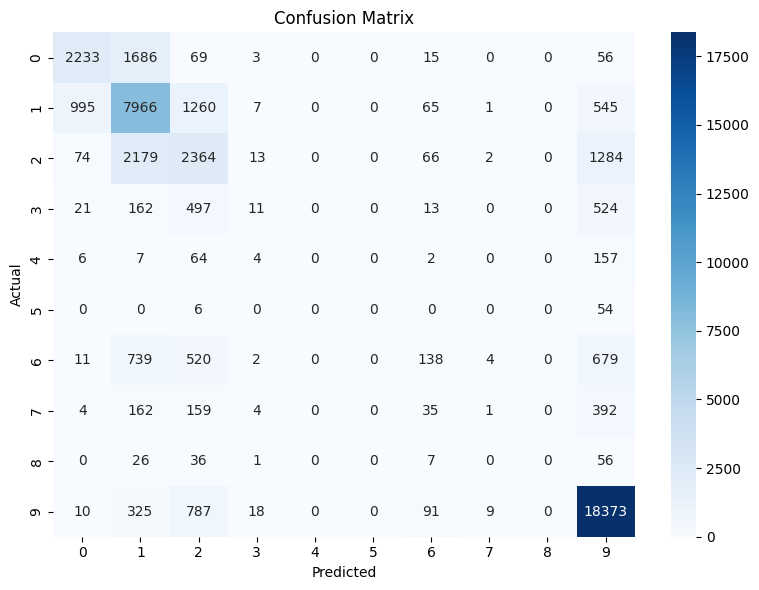

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))

cm = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(cm.shape[0]), yticklabels=range(cm.shape[0]))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()